In [131]:
# impotrt libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, r2_score
from imblearn.over_sampling import SMOTENC
import joblib
import dabl
import nbformat
%matplotlib inline
import os
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.pipeline import Pipeline as imPipeline
import shap



In [70]:
# load dataset
df = pd.read_csv("RTA_dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [71]:
df.shape

(12316, 32)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [73]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [74]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [75]:
# visualize target variable
severity_counts = df['Accident_severity'].value_counts().reset_index()
fig = px.bar(severity_counts,x='Accident_severity',y='count',title='Distribution of Accident Severity')
fig.show()


In [76]:
edu_level = df['Educational_level'].value_counts().reset_index()
fig= px.bar(edu_level ,x='Educational_level', y='count',title='Educational Level of Drivers involved in Accidents')
fig.show()

<Figure size 200x200 with 0 Axes>

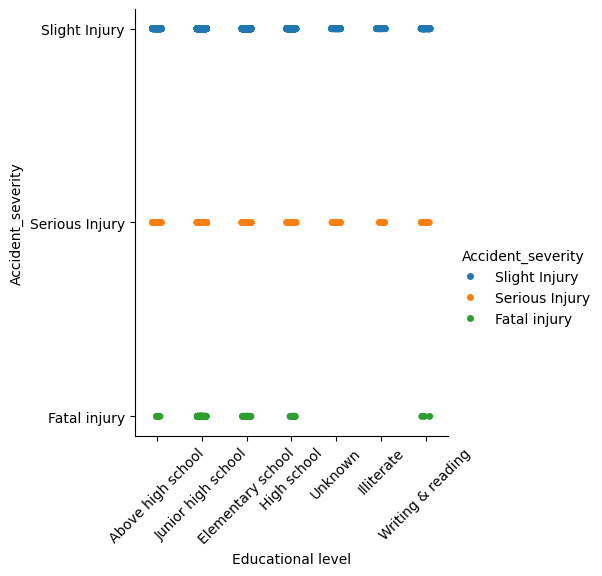

In [77]:
plt.figure(figsize=(2,2))
sns.catplot(x='Educational_level', y='Accident_severity', hue='Accident_severity', data=df)
plt.xlabel("Educational level")
plt.xticks(rotation=45)
plt.show()
 


c:\Users\Admin\miniconda3\envs\accident\Lib\site-packages\dabl\preprocessing.py:177: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

c:\Users\Admin\miniconda3\envs\accident\Lib\site-packages\dabl\preprocessing.py:182: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

c:\Users\Admin\miniconda3\envs\accident\Lib\site-packages\dabl\preprocessing.py:177: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

c:\Users\Admin\miniconda3\envs\accident\Lib\site-packages\dabl\preprocessing.py:177: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `da

Target looks like classification
Showing only top 10 of 31 categorical features


c:\Users\Admin\miniconda3\envs\accident\Lib\site-packages\dabl\plot\utils.py:622: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Accident_severity'>,
 [array([[<Axes: xlabel='Number_of_casualties', ylabel='Number_of_casualties'>]],
        dtype=object)],
 array([[<Axes: title={'center': 'Number_of_vehicles_involved'}>,
         <Axes: title={'center': 'Types_of_Junction'}>,
         <Axes: title={'center': 'Age_band_of_driver'}>,
         <Axes: title={'center': 'Weather_conditions'}>,
         <Axes: title={'center': 'Type_of_vehicle'}>],
        [<Axes: title={'center': 'Area_accident_occured'}>,
         <Axes: title={'center': 'Cause_of_accident'}>,
         <Axes: title={'center': 'Day_of_week'}>,
         <Axes: title={'center': 'Light_conditions'}>,
         <Axes: title={'center': 'Type_of_collision'}>]], dtype=object)]

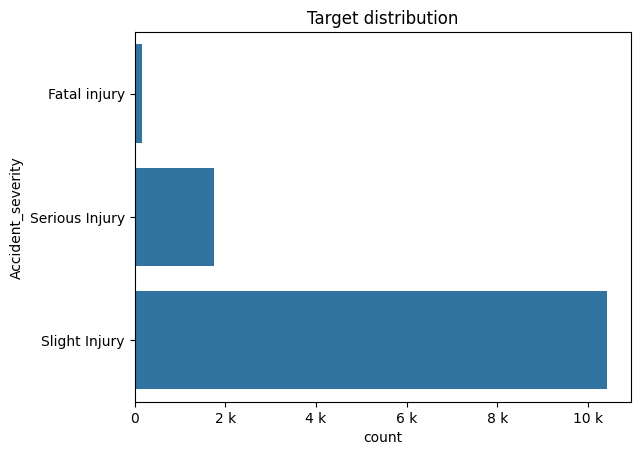

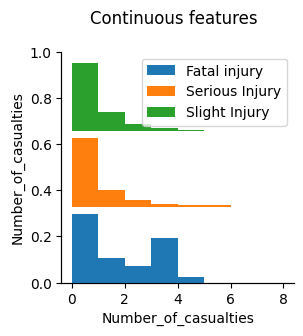

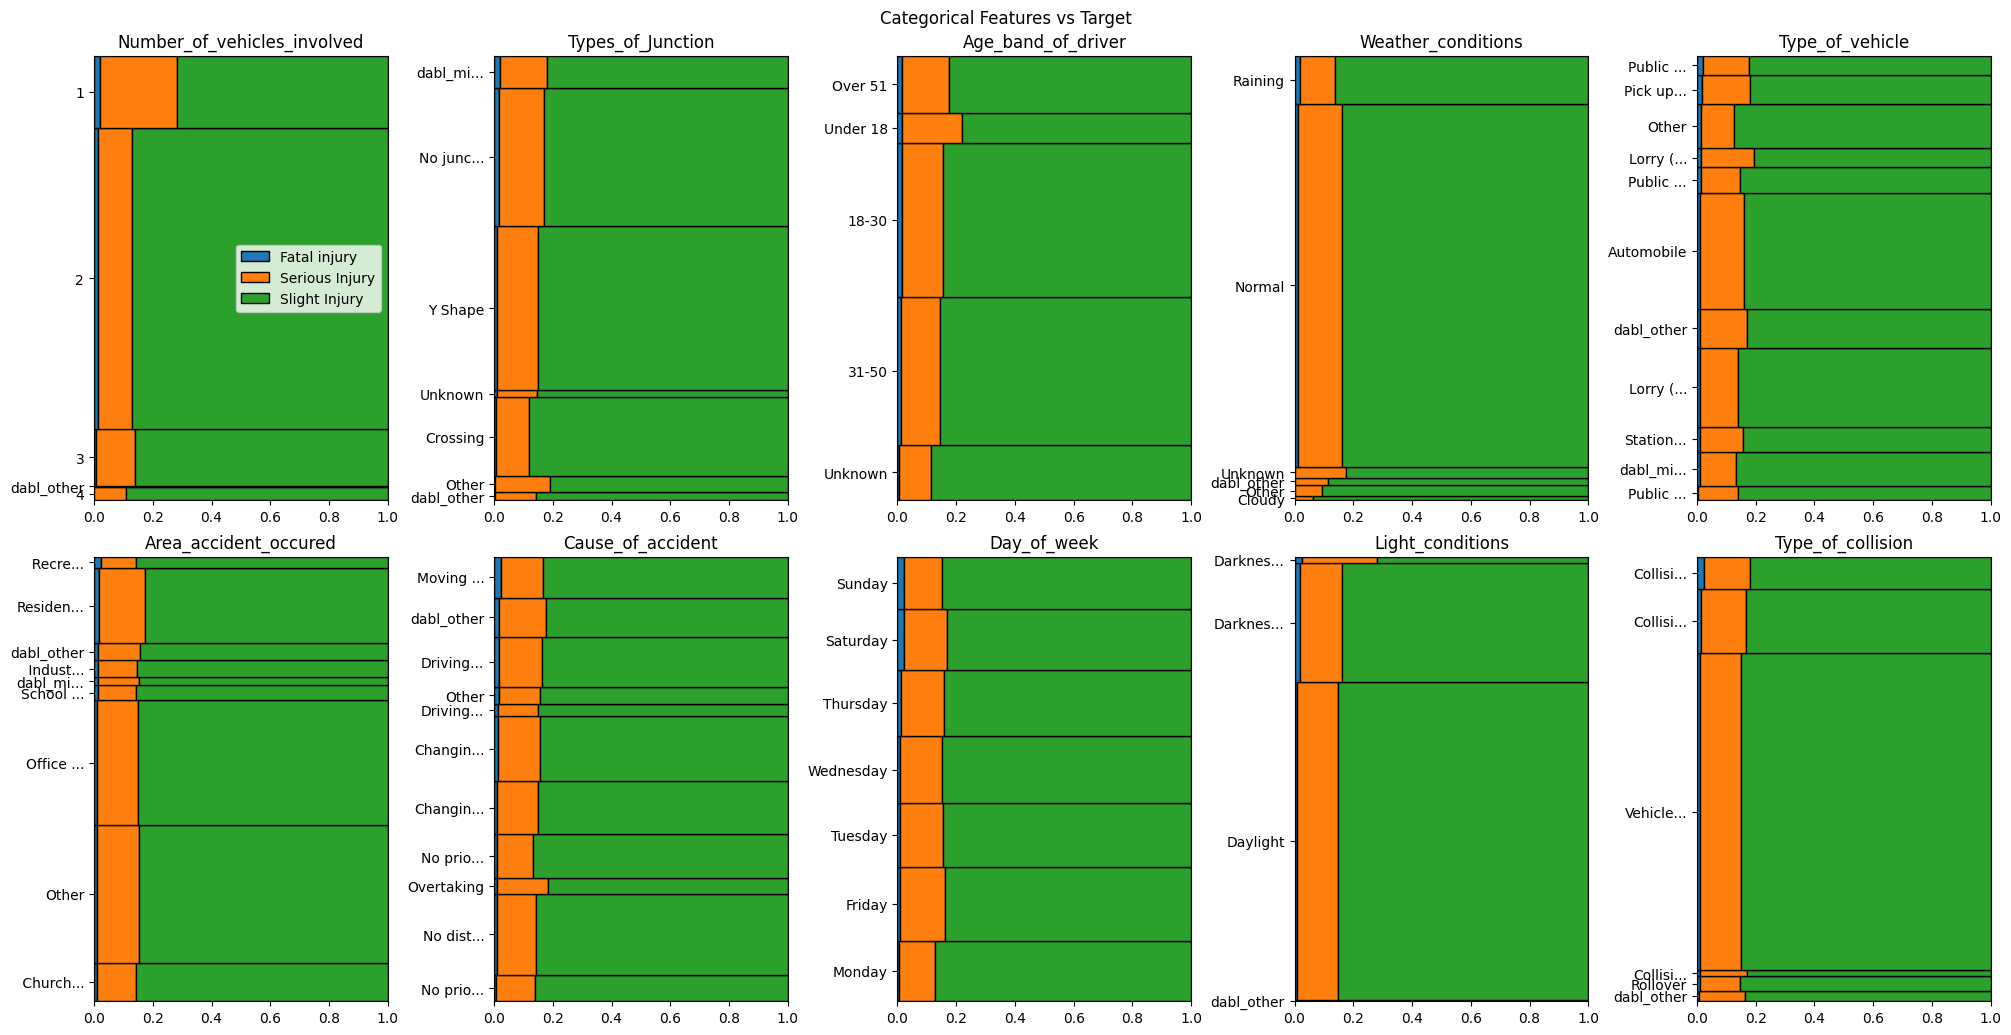

In [78]:
dabl.plot(df, target_col='Accident_severity')

In [79]:
df.select_dtypes(include='number').corr()

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


#### Insights from the Initial Data Analysis 

When more people are injured in an accident, the chances of fatal injuries increase.

Accidents involving more vehicles are more likely to cause serious injuries.

Accidents that happen in dark conditions tend to result in more serious injuries.

The data is not evenly distributed, meaning some accident outcomes occur much more often than others.

Factors like where the accident happens, why it happens, the day of the week, and the type of junction play an important role in fatal accidents.

Road surface and road conditions do not seem to have a major effect on whether accidents are fatal or serious.

In [80]:
road_surf_type = df.groupby(['Accident_severity'])['Road_surface_type'].value_counts().reset_index(name='count')
fig = px.bar(road_surf_type,x='Road_surface_type',y='count', color='Accident_severity',
             title='Road Surface Type vs Accident Severity',barmode='group')
fig.show()


In [81]:
road_surf_con = df.groupby(['Accident_severity'])['Road_surface_conditions'].value_counts().reset_index(name='count')
fig = px.bar(road_surf_con,x='Road_surface_conditions',y='count', color='Accident_severity',
             title='Road Surface Conditions vs Accident Severity',barmode='group')
fig.show()


In [82]:
pivot_df = pd.pivot_table(data=df, 
               index='Road_surface_conditions', 
               columns='Accident_severity',
               aggfunc='count')
pivot_df

Age_band_of_casualty                               \
Accident_severity               Fatal injury Serious Injury Slight Injury   
Road_surface_conditions                                                     
Dry                                    121.0         1332.0        7887.0   
Flood over 3cm. deep                     NaN            NaN           2.0   
Snow                                     NaN            4.0          66.0   
Wet or damp                             37.0          407.0        2460.0   

                        Age_band_of_driver                               \
Accident_severity             Fatal injury Serious Injury Slight Injury   
Road_surface_conditions                                                   
Dry                                  121.0         1332.0        7887.0   
Flood over 3cm. deep                   NaN            NaN           2.0   
Snow                                   NaN            4.0          66.0   
Wet or damp                           37.0          407.0        2460.0   

                        Area_accident_occured                               \
Accident_severity                Fatal injury Serious Injury Slight Injury   
Road_surface_conditions                                                      
Dry                                     119.0         1303.0        7726.0   
Flood over 3cm. deep                      NaN            NaN           2.0   
Snow                                      NaN            4.0          63.0   
Wet or damp                              36.0          402.0        2422.0   

                        Casualty_class  ... Vehicle_driver_relation  \
Accident_severity         Fatal injury  ...           Slight Injury   
Road_surface_conditions                 ...                           
Dry                              121.0  ...                  7524.0   
Flood over 3cm. deep               NaN  ...                     2.0   
Snow                               NaN  ...                    66.0   
Wet or damp                       37.0  ...                  2337.0   

                        Vehicle_movement                               \
Accident_severity           Fatal injury Serious Injury Slight Injury   
Road_surface_conditions                                                 
Dry                                117.0         1291.0        7688.0   
Flood over 3cm. deep                 NaN            NaN           2.0   
Snow                                 NaN            4.0          61.0   
Wet or damp                         35.0          394.0        2416.0   

                        Weather_conditions                               \
Accident_severity             Fatal injury Serious Injury Slight Injury   
Road_surface_conditions                                                   
Dry                                  121.0         1332.0        7887.0   
Flood over 3cm. deep                   NaN            NaN           2.0   
Snow                                   NaN            4.0          66.0   
Wet or damp                           37.0          407.0        2460.0   

                        Work_of_casuality                               
Accident_severity            Fatal injury Serious Injury Slight Injury  
Road_surface_conditions                                                 
Dry                                  87.0          977.0        5811.0  
Flood over 3cm. deep                  NaN            NaN           2.0  
Snow                                  NaN            3.0          47.0  
Wet or damp                          29.0          307.0        1855.0  

[4 rows x 90 columns]

In [83]:
fatal_df = pivot_df['Road_surface_type']
fatal_df.fillna(0, inplace=True)
fatal_df['sum_of_injuries'] = fatal_df['Fatal injury'] + fatal_df['Serious Injury'] + fatal_df['Slight Injury']
fatal_df['sum_of_injuries'] = fatal_df['Fatal injury'] + fatal_df['Serious Injury'] + fatal_df['Slight Injury']
fatal_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_5492\1177801071.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_5492\1177801071.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_5492\1177801071.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

Accident_severity,Fatal injury,Serious Injury,Slight Injury,sum_of_injuries
Road_surface_conditions,,,,
Dry,121.0,1312.0,7774.0,9207.0
Flood over 3cm. deep,0.0,0.0,2.0,2.0
Snow,0.0,4.0,65.0,69.0
Wet or damp,36.0,404.0,2426.0,2866.0


In [84]:
fatal_df_dry = (fatal_df.loc['Dry']/fatal_df.loc['Dry','sum_of_injuries'])*100
fatal_df_dry

Accident_severity
Fatal injury         1.314217
Serious Injury      14.250027
Slight Injury       84.435755
sum_of_injuries    100.000000
Name: Dry, dtype: float64

In [85]:
fatal_df_snow = (fatal_df.loc['Wet or damp']/fatal_df.loc['Wet or damp','sum_of_injuries'])*100
fatal_df_snow

Accident_severity
Fatal injury         1.256106
Serious Injury      14.096301
Slight Injury       84.647592
sum_of_injuries    100.000000
Name: Wet or damp, dtype: float64

In [86]:
df.groupby('Road_surface_conditions')['Accident_severity'].count()

Road_surface_conditions
Dry                     9340
Flood over 3cm. deep       2
Snow                      70
Wet or damp             2904
Name: Accident_severity, dtype: int64

In [87]:
df['Time'] = pd.to_datetime(df['Time'])


C:\Users\Admin\AppData\Local\Temp\ipykernel_5492\720567676.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [88]:
obj_col = [col for col in df.columns if df[col].dtypes == 'object']
obj_cols = [col for col in obj_col if col != 'Accident_severity']
obj_cols

['Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident']

In [89]:
df['Hour'] = df['Time'].dt.hour
ndf = df.drop(['Time'], axis=1)
ndf

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


# categorical data visualization

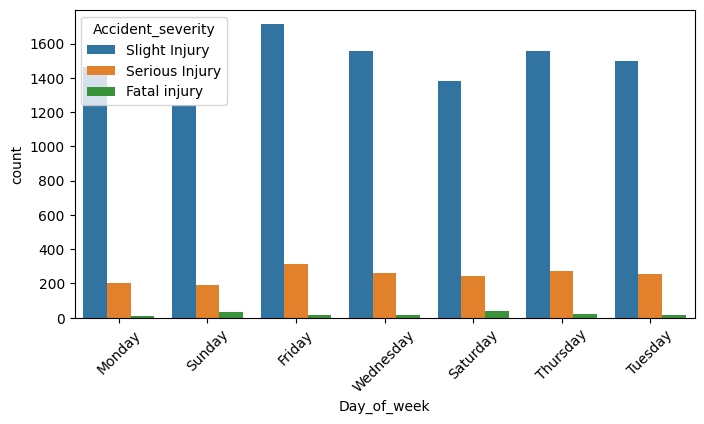

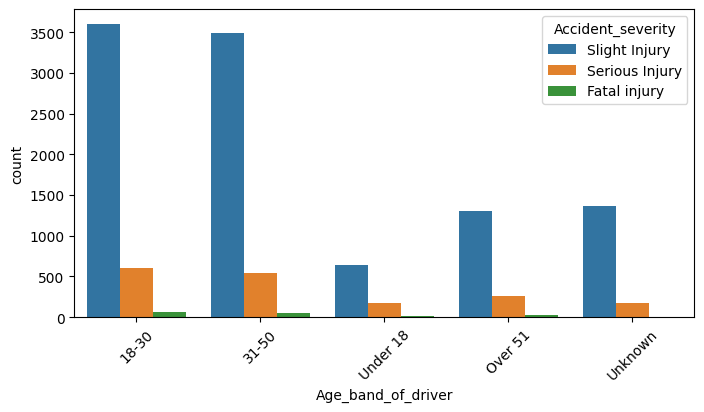

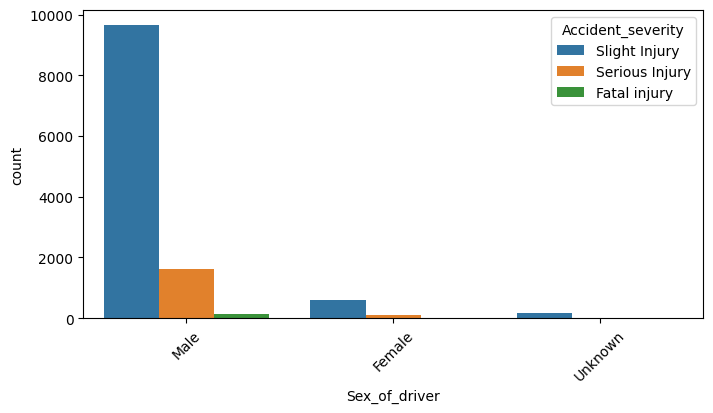

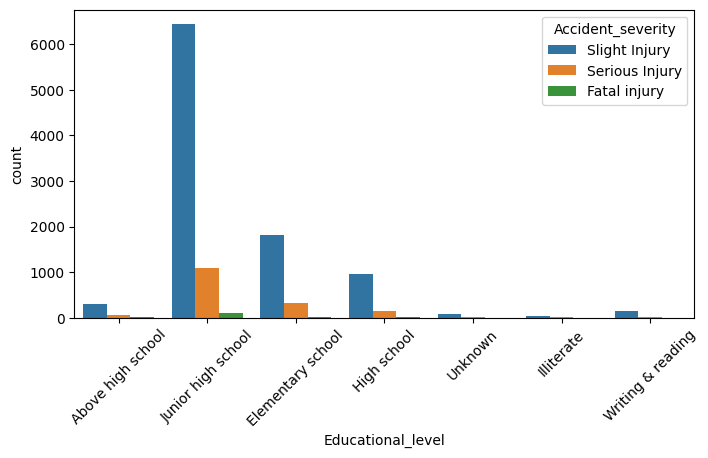

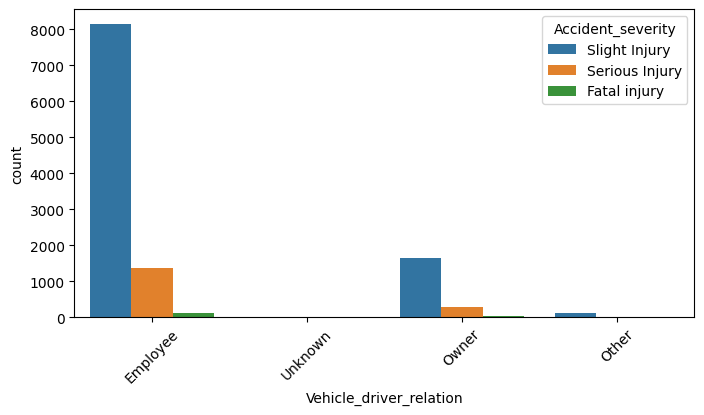

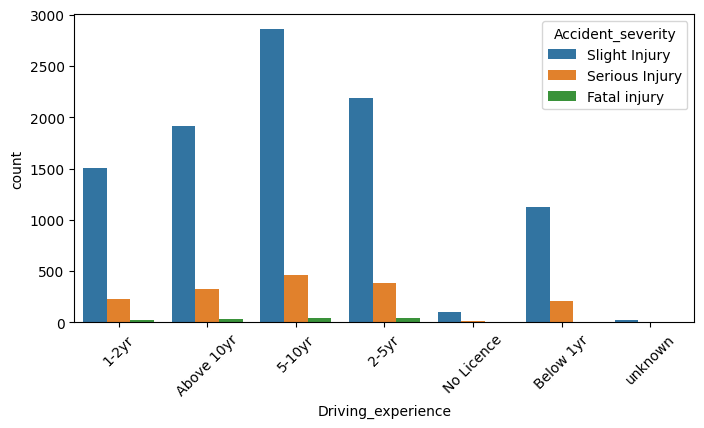

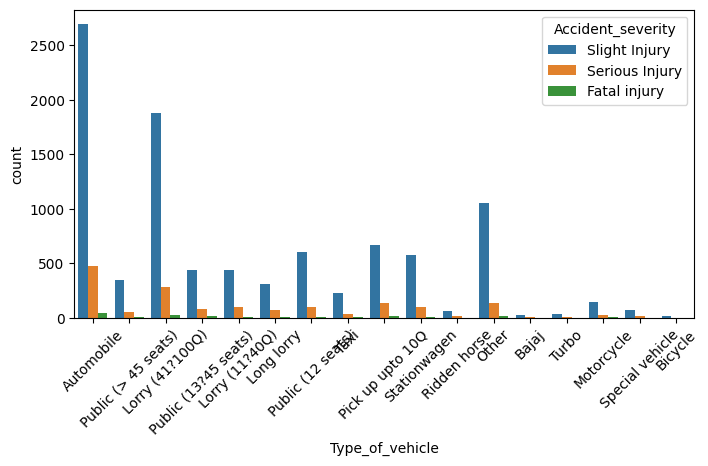

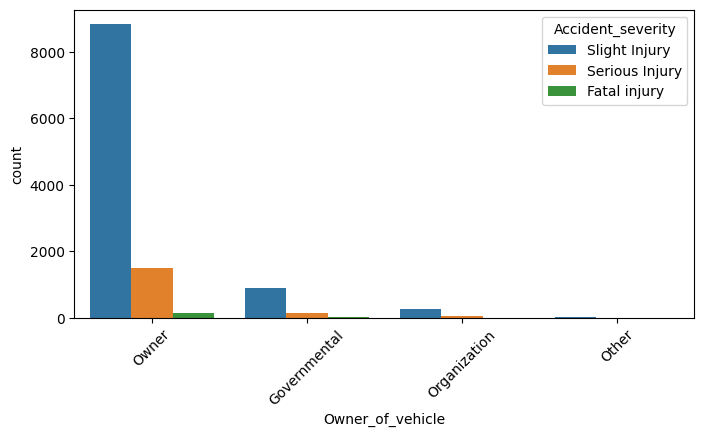

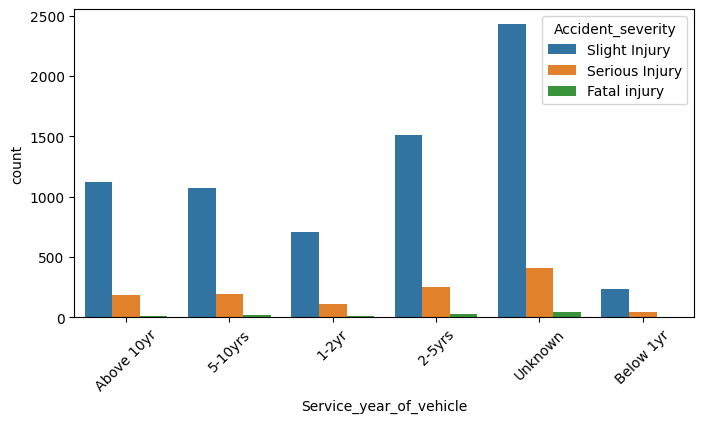

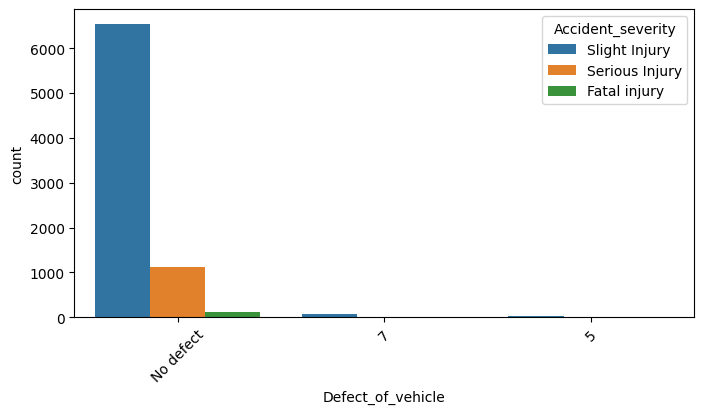

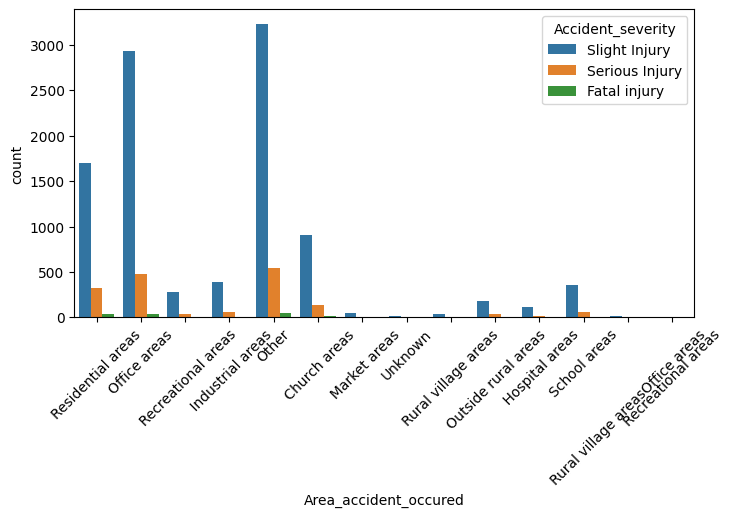

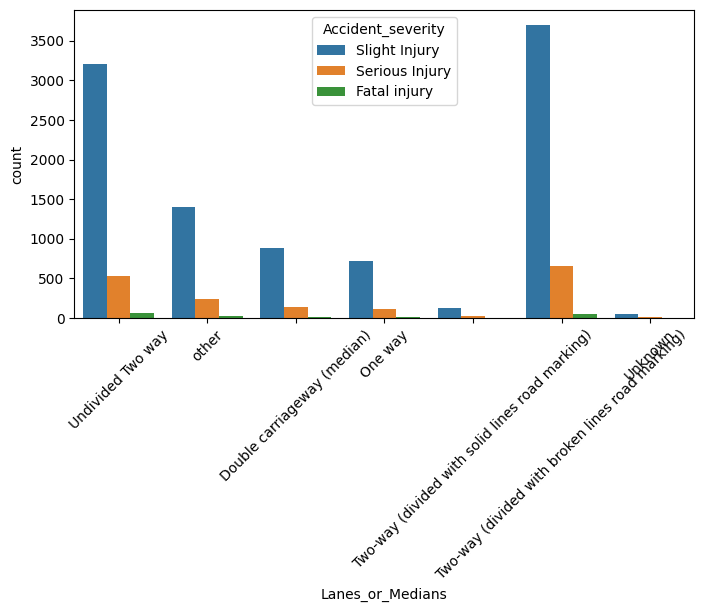

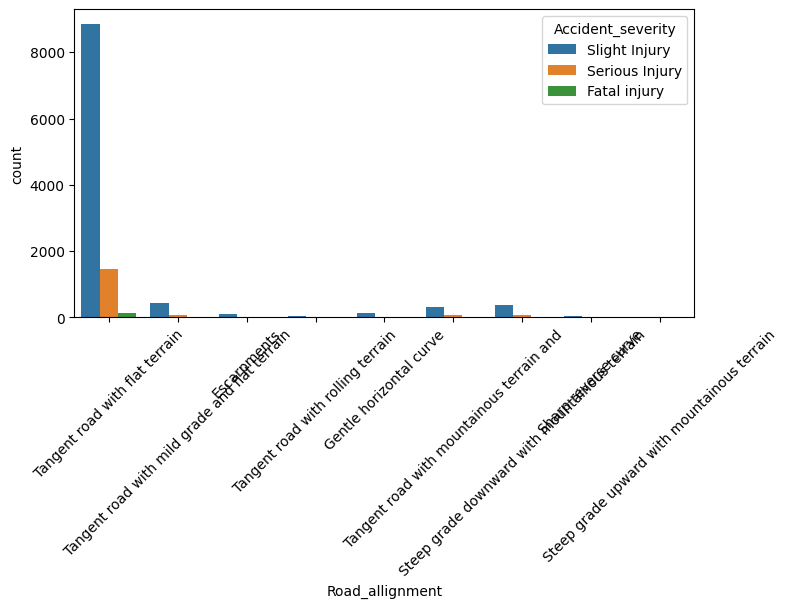

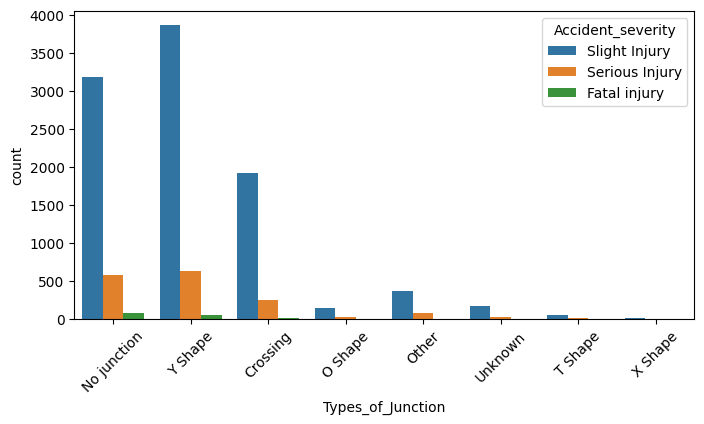

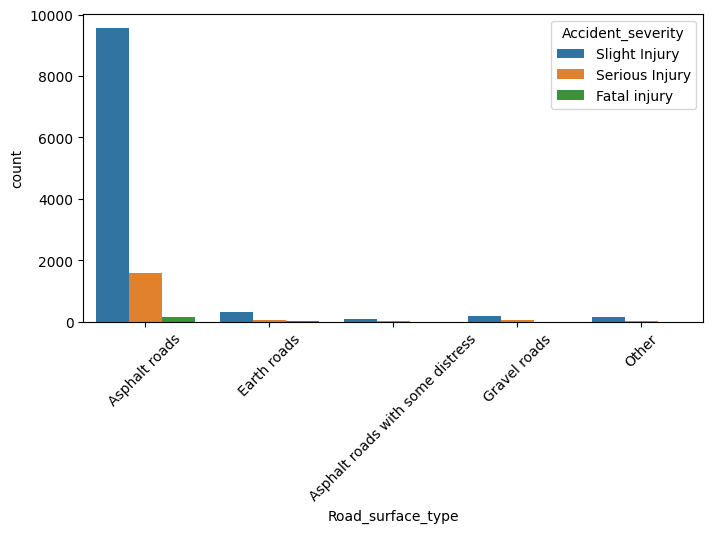

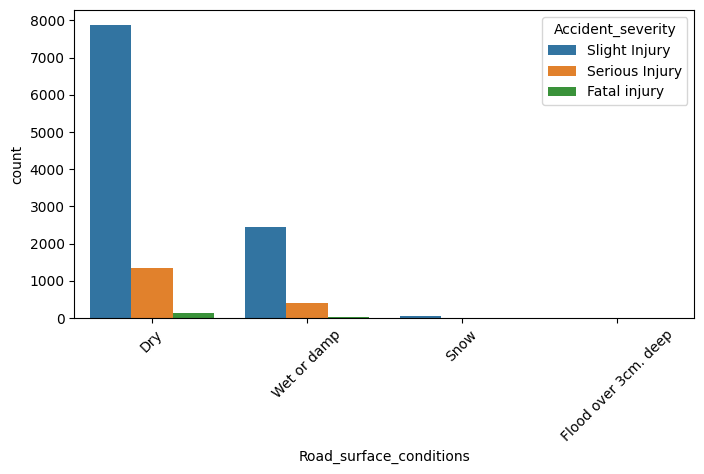

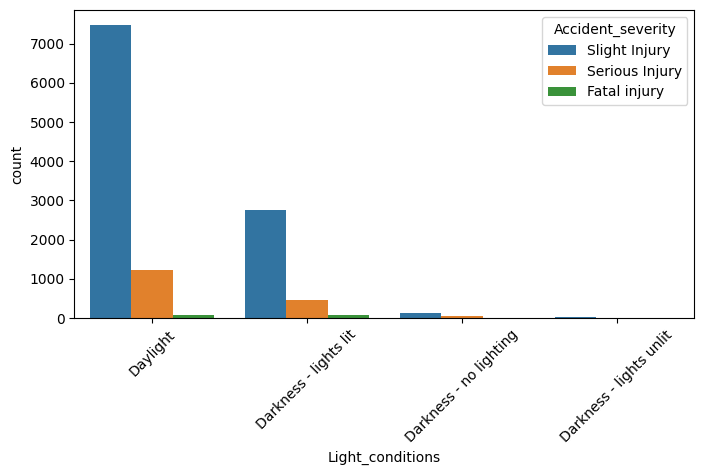

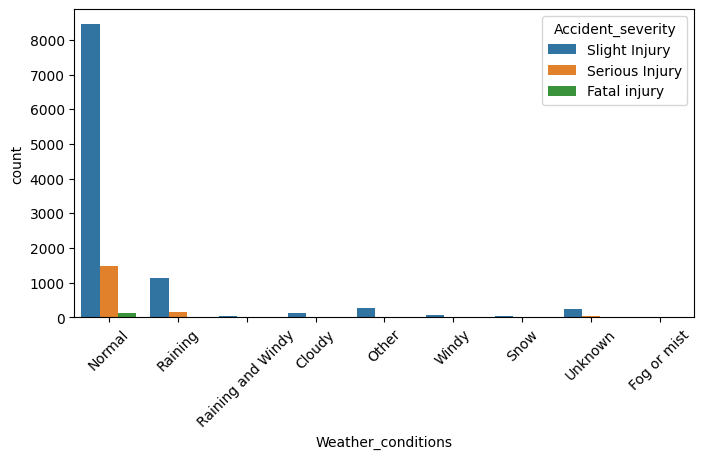

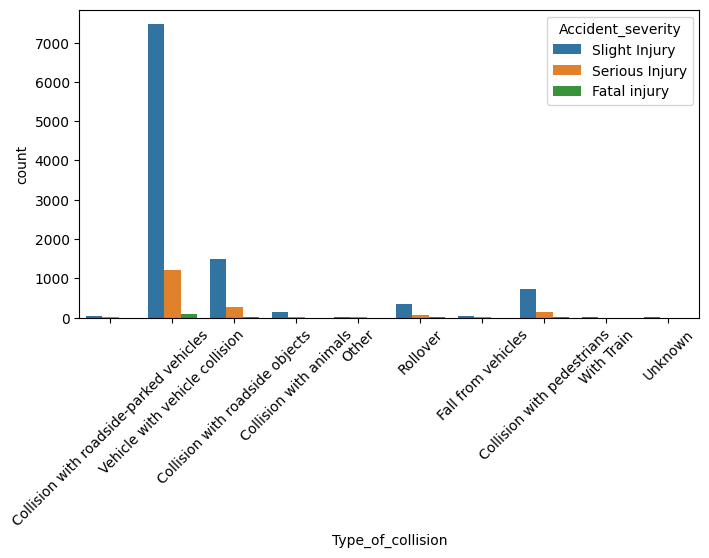

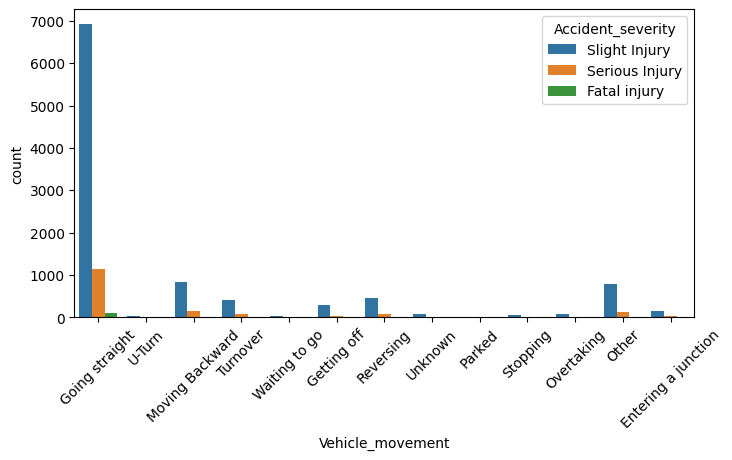

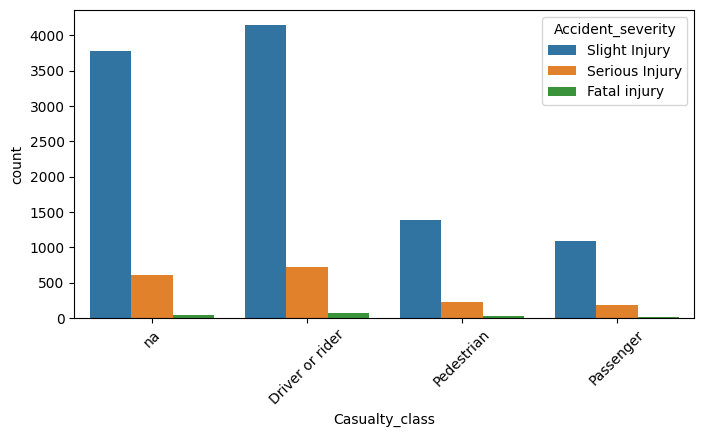

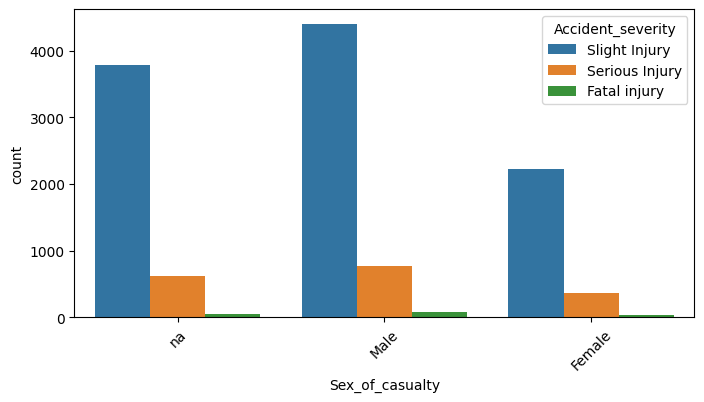

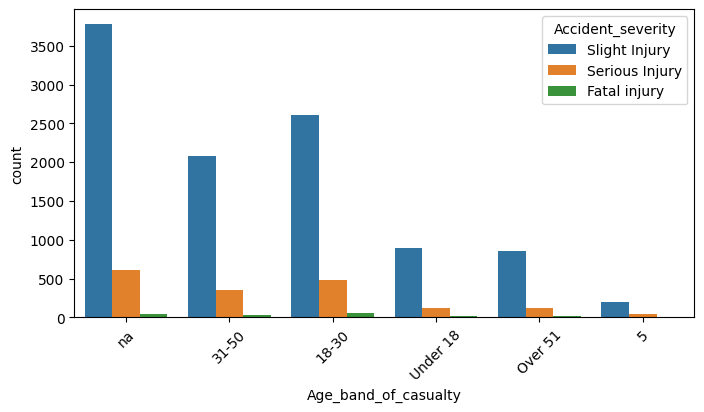

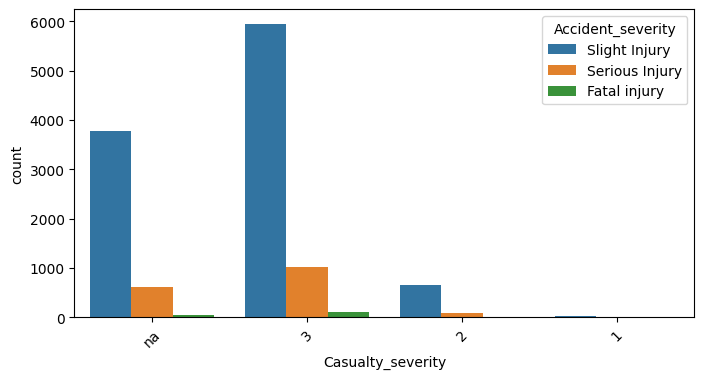

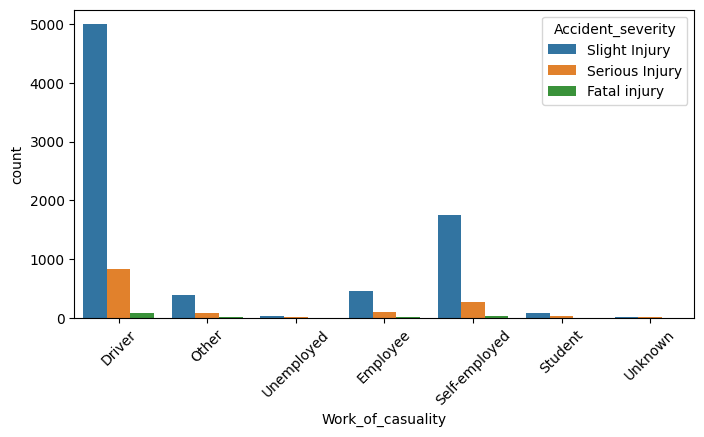

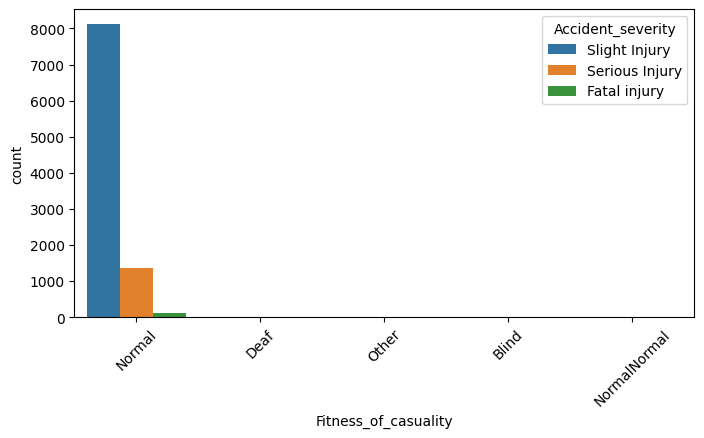

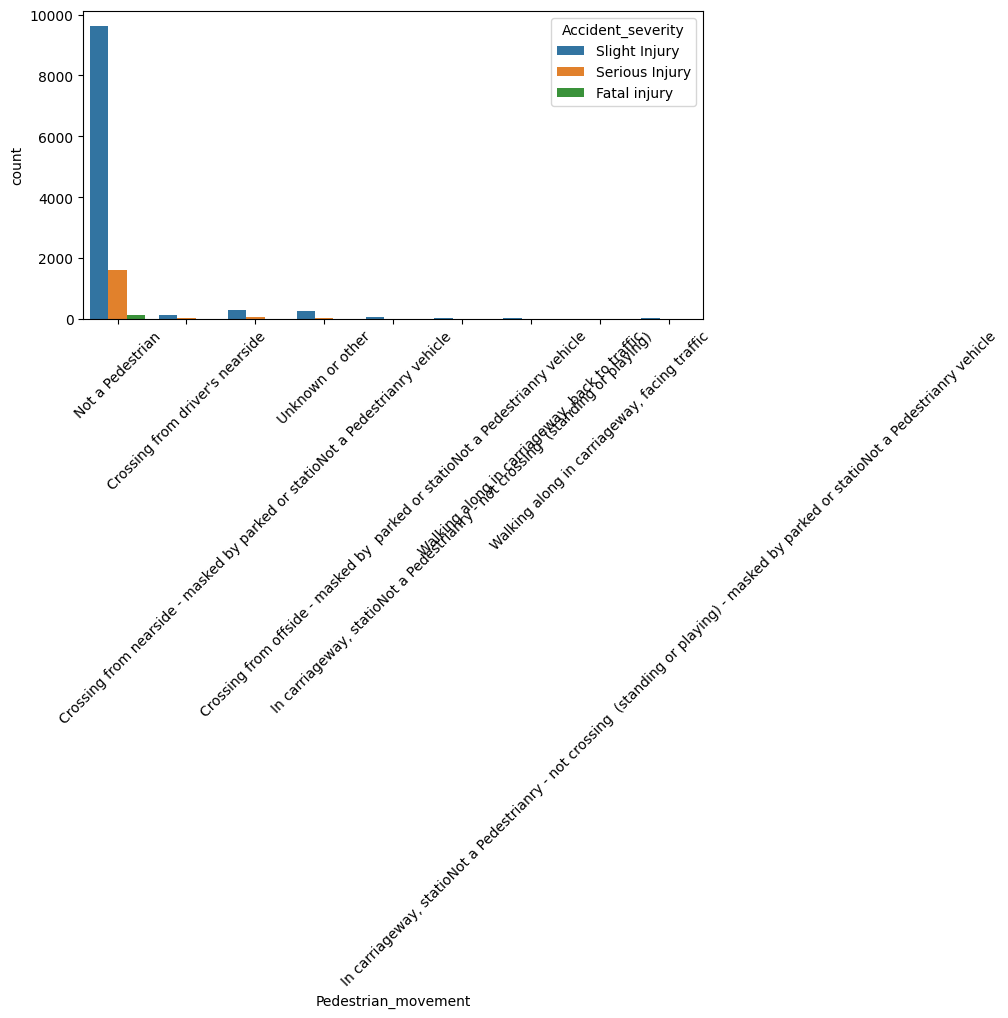

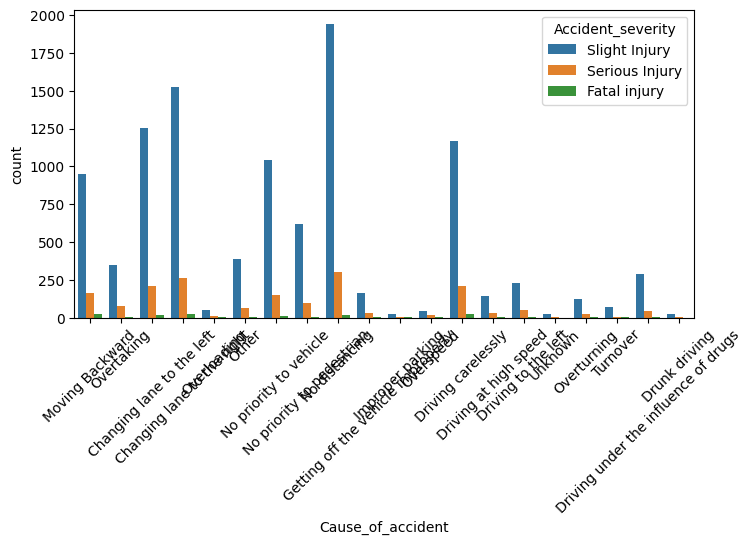

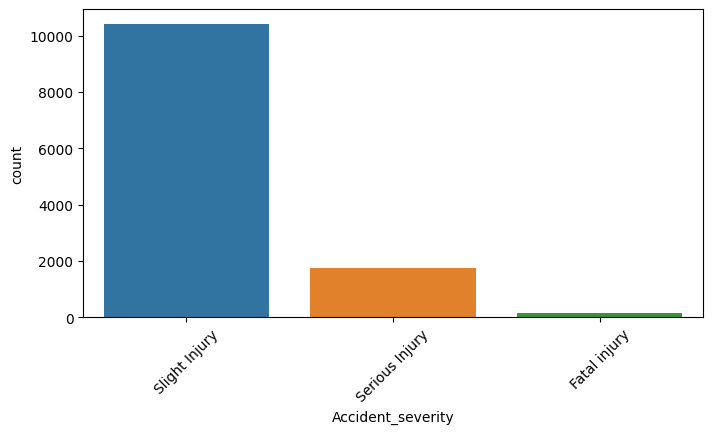

In [90]:
def count_plot(col):
    ndf[col].value_counts()
    plt.figure(figsize=(8,4))
    sns.countplot(x=ndf[col], hue=ndf['Accident_severity'])
    plt.xlabel(col)
    plt.xticks(rotation=45)     
    plt.show()
for col in obj_col:
    count_plot(col)
        

<Figure size 500x500 with 0 Axes>

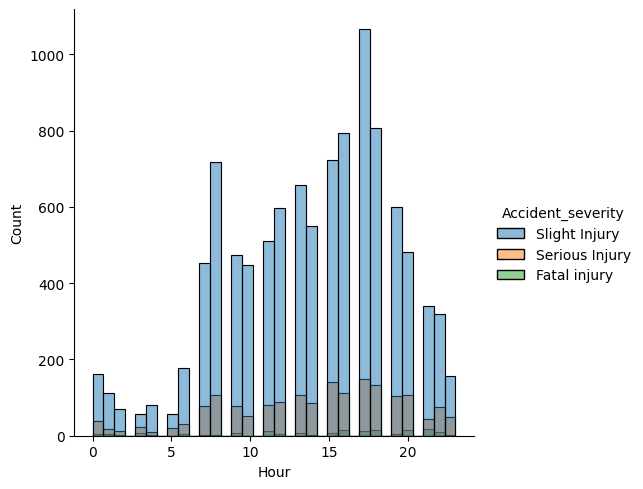

In [91]:
plt.figure(figsize=(5,5))
sns.displot(x='Hour', hue='Accident_severity', data=ndf)
plt.show()

# Data Preprocessing

In [92]:
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour']
len(features)

17

In [93]:
fea_df = ndf[features].copy()
target = ndf['Accident_severity']


In [94]:
fea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12077 non-null  object
 4   Types_of_Junction            11429 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            11575 non-null  object
 8   Vehicle_driver_relation      11737 non-null  object
 9   Type_of_vehicle              11366 non-null  object
 10  Driving_experience           11487 non-null  object
 11  Service_year_of_vehicle      8388 non-null   object
 12  Type_of_collision            12161 non-null  object
 13  Sex_of_casualty              12

In [95]:
# NaN are missing because service info might not be available, we will fill as 'Unknowns'
fea_df['Service_year_of_vehicle'] = fea_df['Service_year_of_vehicle'].fillna('Unknown')
fea_df['Types_of_Junction'] = fea_df['Types_of_Junction'].fillna('Unknown')
fea_df['Area_accident_occured'] = fea_df['Area_accident_occured'].fillna('Unknown')
fea_df['Driving_experience'] = fea_df['Driving_experience'].fillna('unknown')
fea_df['Type_of_vehicle'] = fea_df['Type_of_vehicle'].fillna('Other')
fea_df['Vehicle_driver_relation'] = fea_df['Vehicle_driver_relation'].fillna('Unknown')
fea_df['Educational_level'] = fea_df['Educational_level'].fillna('Unknown')
fea_df['Type_of_collision'] = fea_df['Type_of_collision'].fillna('Unknown')

In [96]:
fea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12316 non-null  object
 4   Types_of_Junction            12316 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            12316 non-null  object
 8   Vehicle_driver_relation      12316 non-null  object
 9   Type_of_vehicle              12316 non-null  object
 10  Driving_experience           12316 non-null  object
 11  Service_year_of_vehicle      12316 non-null  object
 12  Type_of_collision            12316 non-null  object
 13  Sex_of_casualty              12

# One Hot Encoding
One-hot encoding to encode categorical features and LabelEncoder() to encode the labels

In [97]:
X = fea_df[features]
y = target

In [98]:
# using pandas get_dummies method for on-hot encoding
enc_df = pd.get_dummies(X, drop_first=True)
enc_df.shape

(12316, 106)

In [99]:
# Lable encoding of Target Feature
lb = LabelEncoder()
lb.fit(y)
y_enc  = lb.transform(y)
print("Encoded labels:",lb.classes_)
enc_y = pd.Series(y_enc)
enc_y

Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


0        2
1        2
2        1
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Length: 12316, dtype: int64

In [100]:
# One-hot encode features
x_corr = pd.get_dummies(X, drop_first=True)

# Encode target
lb = LabelEncoder()
y_corr = lb.fit_transform(y)

# Correlation with target
x_corr['target'] = y_corr
corr_target = x_corr.corr()['target'].sort_values(ascending=False)
corr_target[-107:-84]

target                                                       1.000000
Number_of_vehicles_involved                                  0.096023
Age_band_of_driver_Unknown                                   0.045116
Day_of_week_Monday                                           0.030887
Type_of_vehicle_Other                                        0.027760
Type_of_collision_Vehicle with vehicle collision             0.024670
Cause_of_accident_No distancing                              0.018242
Cause_of_accident_No priority to vehicle                     0.018015
Type_of_vehicle_Lorry (41?100Q)                              0.017509
Area_accident_occured_ Hospital areas                        0.016683
Sex_of_driver_Unknown                                        0.016349
Age_band_of_casualty_Under 18                                0.015158
Age_band_of_driver_31-50                                     0.014552
Driving_experience_No Licence                                0.013809
Age_band_of_casualty

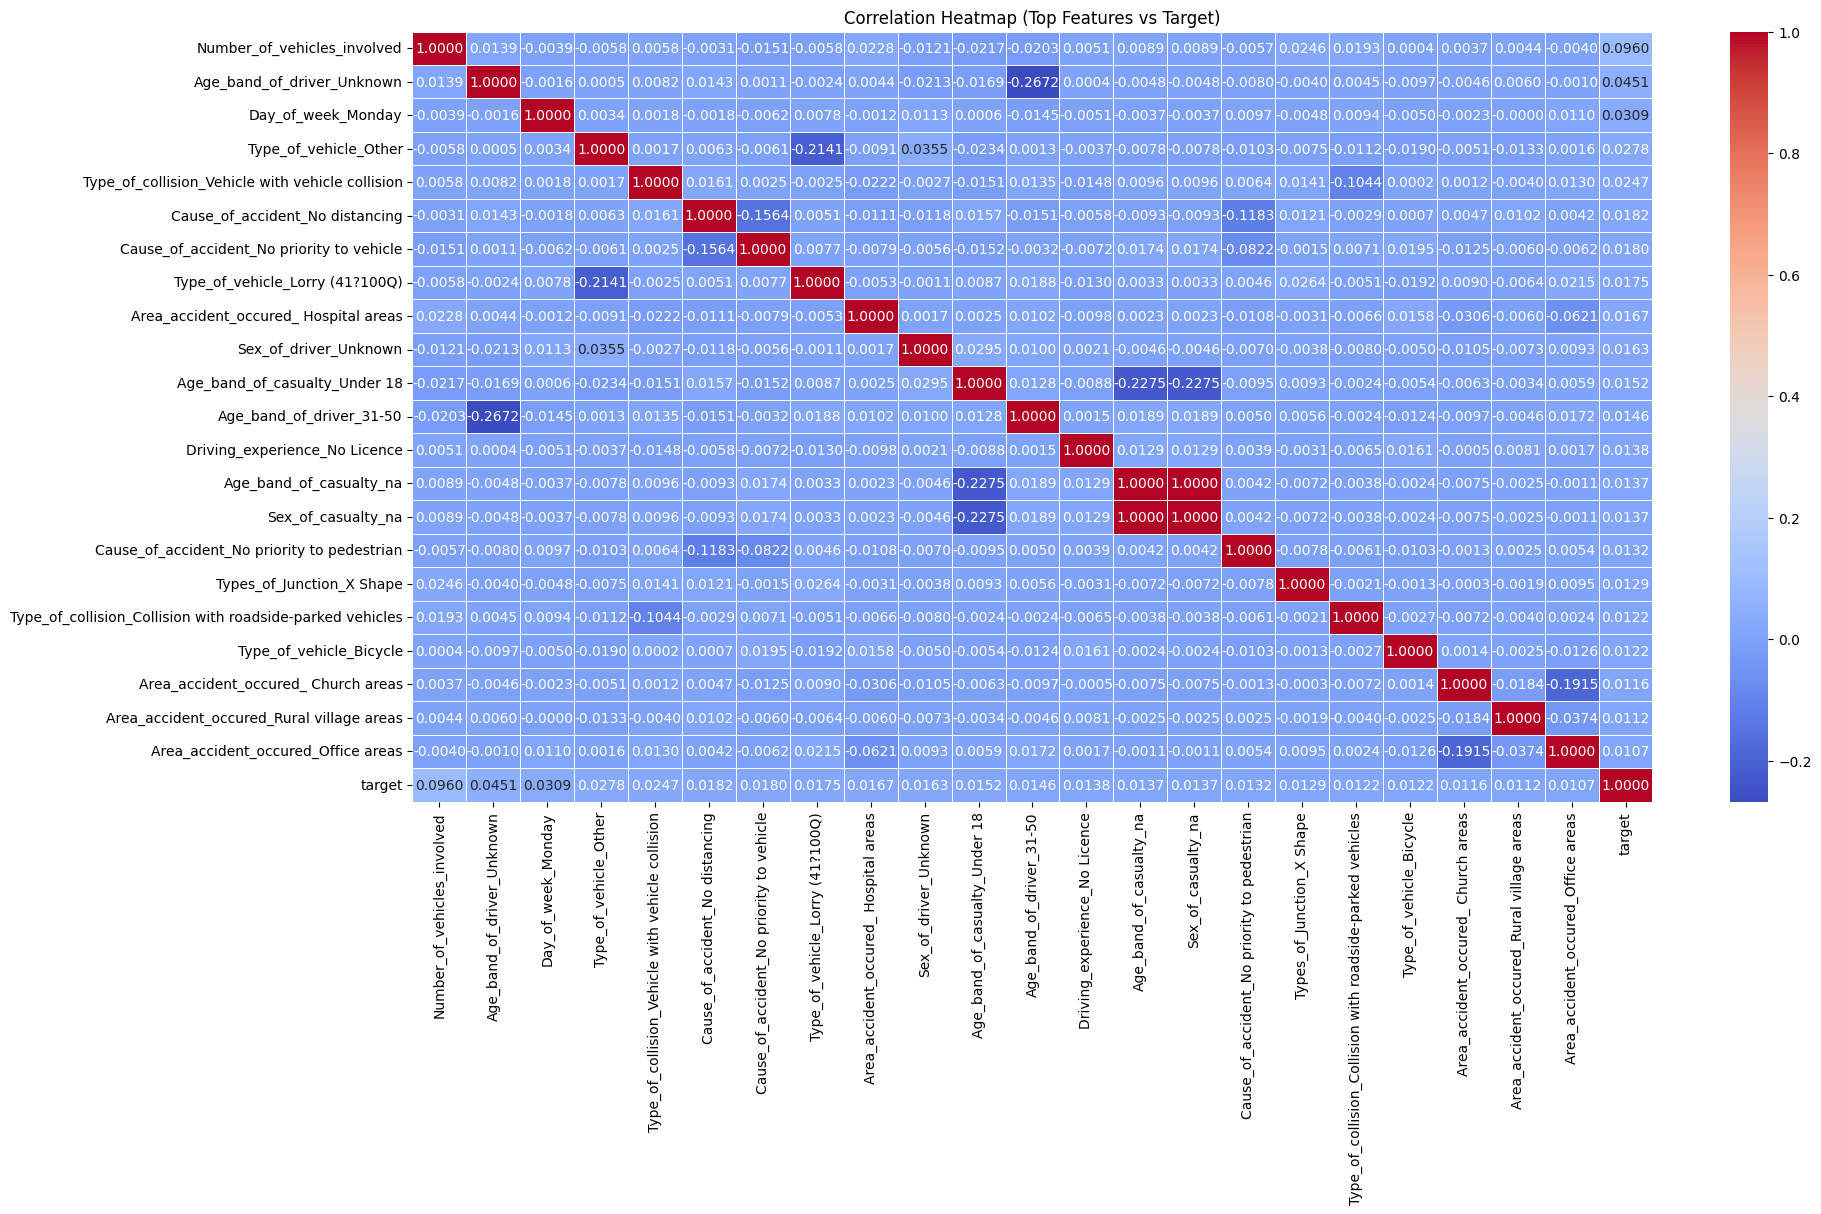

In [101]:
# Select top N correlated features (excluding target itself)
top_n = 22
top_features = corr_target.index[1:top_n+1]

# Correlation matrix of selected features + target
corr_matrix = x_corr[top_features.tolist() + ['target']].corr()
# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".4f",
    linewidths=0.5
)
plt.title("Correlation Heatmap (Top Features vs Target)")
plt.show()


# Feature selection using k best chi2 method

In [102]:
## mutual info classif to check informative features
mi_calc = mutual_info_classif(enc_df, enc_y, random_state=42)


In [103]:
mi_df = pd.DataFrame({'Columns':enc_df.columns, 'MI_score':mi_calc}) 
mi_df.sort_values(by='MI_score', ascending=False).head(15)

,Columns,MI_score
1,Number_of_casualties,0.013635
0,Number_of_vehicles_involved,0.013190
2,Hour,0.006590
46,Type_of_vehicle_Long lorry,0.006190
28,Types_of_Junction_Y Shape,0.005586
69,Service_year_of_vehicle_Below 1yr,0.005561
11,Area_accident_occured_ Hospital areas,0.005284
61,Driving_experience_5-10yr,0.005239
26,Types_of_Junction_Unknown,0.004723
104,Cause_of_accident_Turnover,0.004536


In [104]:
# feature seleciton method using chi2 for categorical output, categorical input
fs = SelectKBest(score_func=chi2, k=50)
x_sec = fs.fit_transform(enc_df,enc_y)
print(x_sec.shape)
col_names = fs.get_feature_names_out()
fs_df = pd.DataFrame(x_sec, columns=col_names)
fs_df

(12316, 50)


,Number_of_vehicles_involved,Number_of_casualties,Hour,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Area_accident_occured_ Recreational areas,Area_accident_occured_ Hospital areas,Area_accident_occured_ Outside rural areas,Area_accident_occured_Recreational areas,...,Cause_of_accident_Driving to the left,Cause_of_accident_Improper parking,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Turnover
0,2,2,17,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,2,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,2,17,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2,1,16,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12312,2,1,18,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12313,1,1,13,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12314,2,1,13,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PCA

In [105]:
pca = PCA(n_components=3)
pca.fit(enc_df)
x_pca= pca.transform(enc_df)
components = pca.components_

pca_df = pd.DataFrame(x_pca, columns=['PC1','PC2','PC3'])
pca_df.var()

PC1    27.074680
PC2     1.054314
PC3     0.630354
dtype: float64

# Imbalance data treatment


In [106]:
# categorical features for SMOTENC technique for categorical features
n_cat_index = list(range(3,fs_df.shape[1]))
smote = SMOTENC(categorical_features=n_cat_index, random_state=42)
x_n, y_n = smote.fit_resample(fs_df,enc_y)
x_n.shape, y_n.shape

((31245, 50), (31245,))

In [107]:
y_n.value_counts()

2    10415
1    10415
0    10415
Name: count, dtype: int64

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x_n, y_n,test_size=0.2, random_state=42, stratify=y_n)


# Baseline Random Forest Classifier

In [136]:
# modelling using random forest baseline
rf_1= RandomForestClassifier()
rf_1.fit(X_train, y_train)
# predicting on test data
prediction = rf_1.predict(X_test)
# test score 
r2_score_rf1 = r2_score(prediction, y_test)
print('Accuracy_rf1:', r2_score_rf1)
f1score_rf1 = f1_score(y_test,prediction, average='weighted')
print("f1 score_rf1:", f1score_rf1)
Precision_rf1= precision_score(y_test,prediction, average='weighted')
print("Precision_rf1:", Precision_rf1)
Recall_rf1 = recall_score(y_test,prediction, average='weighted')
print("Recall_rf1:", Recall_rf1)

Accuracy_rf1: 0.5943878471876308
f1 score_rf1: 0.7312788072308424
Precision_rf1: 0.7293001383718462
Recall_rf1: 0.7388382141142583


In [110]:
classif_re_rf1 = classification_report(y_test,prediction)
print(classif_re_rf1)

              precision    recall  f1-score   support

           0       0.72      0.67      0.69      2083
           1       0.63      0.56      0.60      2083
           2       0.84      0.99      0.91      2083

    accuracy                           0.74      6249
   macro avg       0.73      0.74      0.73      6249
weighted avg       0.73      0.74      0.73      6249



In [111]:
conf_matrix_rf1 = confusion_matrix(y_test, prediction)
conf_matrix_rf1

array([[1393,  656,   34],
       [ 554, 1176,  353],
       [   0,   31, 2052]])

# Ordinal Encoder

In [112]:
new_fea_df = fea_df[['Type_of_collision','Age_band_of_driver','Sex_of_driver',
       'Educational_level','Service_year_of_vehicle','Day_of_week','Area_accident_occured']]
ord_enc = OrdinalEncoder()
encod_df2 = pd.DataFrame(ord_enc.fit_transform(new_fea_df))
encod_df2.columns = new_fea_df.columns
encod_df2

,Type_of_collision,Age_band_of_driver,Sex_of_driver,Educational_level,Service_year_of_vehicle,Day_of_week,Area_accident_occured
0,3.0,0.0,1.0,0.0,3.0,1.0,9.0
1,8.0,1.0,1.0,4.0,2.0,1.0,6.0
2,2.0,0.0,1.0,4.0,5.0,1.0,1.0
3,8.0,0.0,1.0,4.0,5.0,3.0,6.0
4,8.0,0.0,1.0,4.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...
12311,8.0,1.0,1.0,5.0,5.0,6.0,5.0
12312,8.0,4.0,1.0,1.0,5.0,3.0,5.0
12313,8.0,2.0,1.0,4.0,1.0,3.0,5.0
12314,8.0,0.0,0.0,4.0,1.0,3.0,6.0


In [113]:
joblib.dump(ord_enc, "trained_models/ordinal_encoder.joblib")

['trained_models/ordinal_encoder.joblib']

In [114]:
final_df = pd.concat([encod_df2,fea_df[['Hour','Number_of_vehicles_involved','Number_of_casualties']]], axis=1)
final_df.head(5)

,Type_of_collision,Age_band_of_driver,Sex_of_driver,Educational_level,Service_year_of_vehicle,Day_of_week,Area_accident_occured,Hour,Number_of_vehicles_involved,Number_of_casualties
0,3.0,0.0,1.0,0.0,3.0,1.0,9.0,17,2,2
1,8.0,1.0,1.0,4.0,2.0,1.0,6.0,17,2,2
2,2.0,0.0,1.0,4.0,5.0,1.0,1.0,17,2,2
3,8.0,0.0,1.0,4.0,5.0,3.0,6.0,1,2,2
4,8.0,0.0,1.0,4.0,2.0,3.0,4.0,1,2,2


In [115]:
final_df.shape

(12316, 10)

In [116]:
## mutual info classif to check informative features
mi_calc2 = mutual_info_classif(final_df, enc_y, random_state=42)
mi_df2 = pd.DataFrame({'Columns':final_df.columns, 'MI_score':mi_calc2})
mi_df2_sorted = mi_df2.sort_values(by='MI_score',ascending=False)
mi_df2_sorted

,Columns,MI_score
8,Number_of_vehicles_involved,0.018180
9,Number_of_casualties,0.010658
5,Day_of_week,0.005565
7,Hour,0.003102
4,Service_year_of_vehicle,0.003042
1,Age_band_of_driver,0.002464
0,Type_of_collision,0.000000
3,Educational_level,0.000000
2,Sex_of_driver,0.000000
6,Area_accident_occured,0.000000


In [117]:
s_final_df = pd.concat([fea_df[['Number_of_vehicles_involved','Number_of_casualties','Hour']],encod_df2], axis=1)
s_final_df.head()

,Number_of_vehicles_involved,Number_of_casualties,Hour,Type_of_collision,Age_band_of_driver,Sex_of_driver,Educational_level,Service_year_of_vehicle,Day_of_week,Area_accident_occured
0,2,2,17,3.0,0.0,1.0,0.0,3.0,1.0,9.0
1,2,2,17,8.0,1.0,1.0,4.0,2.0,1.0,6.0
2,2,2,17,2.0,0.0,1.0,4.0,5.0,1.0,1.0
3,2,2,1,8.0,0.0,1.0,4.0,5.0,3.0,6.0
4,2,2,1,8.0,0.0,1.0,4.0,2.0,3.0,4.0


# Baseline model with some parameters

In [ ]:
# train and test split and building baseline model to predict target features
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    s_final_df, enc_y, test_size=0.2, random_state=42
)
# modelling using random forest baseline
rf2 = RandomForestClassifier(n_estimators=700, max_depth=20, random_state=42)
rf2.fit(X_train2, y_train2)
# predicting on test data
predict2 = rf2.predict(X_test2)
print('rf2 score:', rf2.score(X_test2, y_test2))

r2_score_rf2 = r2_score(predict2, y_test2)
print('Accuracy_rf2:', r2_score_rf2)
f1score_rf2 = f1_score(y_test2,predict2, average='weighted')
print("f1 score_rf2:", f1score_rf2)
Precision_rf2 = precision_score(y_test2,predict2, average='weighted')
print("Precision_rf2:", Precision_rf2)
Recall_rf2 = recall_score(y_test2,predict2, average='weighted')
print("Recall_rf2:", Recall_rf2)

rf2 score: 0.8494318181818182
f1 score_rf2: 0.8025181469609677
Accuracy_rf2: -4.2667148871455325
f1 score_rf2: 0.8025181469609677
Precision_rf2: 0.8286754006862702
Recall_rf2: 0.8494318181818182


In [119]:
classif_re_rf2 = classification_report(y_test2,predict2)
print(classif_re_rf2)

              precision    recall  f1-score   support

           0       1.00      0.16      0.28        37
           1       0.67      0.12      0.21       363
           2       0.85      0.99      0.92      2064

    accuracy                           0.85      2464
   macro avg       0.84      0.42      0.47      2464
weighted avg       0.83      0.85      0.80      2464



In [120]:
# save the model
joblib.dump(rf2, "trained_models/rta_model.joblib", compress=9)


['trained_models/rta_model.joblib']

# Hyperparameter tuning of RF

In [ ]:
# Split data stratified
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    s_final_df, enc_y, test_size=0.2, random_state=42)

# categorical indices based on final features
categorical_indices = [3,4,5,6,7,8,9]
# Pipeline with SMOTE + RandomForest
pipeline_rf= imPipeline([
    ("smote", SMOTENC(categorical_features=categorical_indices, random_state=42)),
    ("model_rf", RandomForestClassifier(random_state=42))
])


# Hyperparameter tuning
params_rf = {
    "model_rf__n_estimators": [1,200],
    "model_rf__max_depth": [10,20]
}

grid_rf= GridSearchCV(
    pipeline_rf,
    param_grid=params_rf,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

grid_rf.fit(X_train2, y_train2)

print("RF Best Params:", grid_rf.best_params_)
print("RF Best Score:", grid_rf.best_score_)

# Evaluate
pred_rf  = grid_rf.predict(X_test2)
print("RF F1 Score:", f1_score(y_test2, pred_rf, average="weighted"))
print("RF R2 score:", r2_score(y_test2, pred_rf))
print("RF Precision Score:", precision_score(y_test2, pred_rf, average="weighted"))
print("RF Recall Score:", recall_score(y_test2, pred_rf, average="weighted"))

# Cross Validation
scores_rf = cross_val_score(grid_rf.best_estimator_, s_final_df, enc_y, cv=5, scoring="f1_weighted")
print("RF CV Mean:", scores_rf.mean())



RF Best Params: {'model_rf__max_depth': 20, 'model_rf__n_estimators': 200}
RF Best Score: 0.7747970432492994
RF F1 Score: 0.7709001010614953
RF R2 Score: -0.6724477711150745
RF Precision Score: 0.7598372011269194
RF Recall Score: 0.7885551948051948
RF CV Mean: 0.7651103341551073


In [123]:
classif_re_rf = classification_report(y_test2,pred_rf)
print(classif_re_rf)

              precision    recall  f1-score   support

           0       0.15      0.24      0.18        37
           1       0.28      0.16      0.21       363
           2       0.85      0.91      0.88      2064

    accuracy                           0.79      2464
   macro avg       0.43      0.44      0.42      2464
weighted avg       0.76      0.79      0.77      2464



# Hyperparameter tuning of KNN

In [142]:
# Pipeline: SMOTENC + KNN
pipeline_knn = imPipeline([
    ("smote", SMOTENC(categorical_features=categorical_indices, random_state=42)),
    ("model_knn", KNeighborsClassifier())
])

# Hyperparameter tuning
params_knn = {
    "model_knn__n_neighbors": [3, 5, 7, 9, 11],
    "model_knn__weights": ["uniform", "distance"],
    "model_knn__metric": ["euclidean", "manhattan"]
}

grid_knn = GridSearchCV(
    pipeline_knn,
    param_grid=params_knn,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

# Train
grid_knn.fit(X_train2, y_train2)

print("Best Params (KNN):", grid_knn.best_params_)
print("Best CV Score (KNN):", grid_knn.best_score_)

# Test evaluation
pred_knn = grid_knn.predict(X_test2)
print("KNN F1 Score:", f1_score(y_test2, pred_knn, average="weighted"))
print("KNN Precision:", precision_score(y_test2, pred_knn, average="weighted"))
print("KNN Recall:", recall_score(y_test2, pred_knn, average="weighted"))


Best Params (KNN): {'model_knn__metric': 'manhattan', 'model_knn__n_neighbors': 11, 'model_knn__weights': 'distance'}
Best CV Score (KNN): 0.7665155673486532
KNN F1 Score: 0.7670056882011296
KNN Precision: 0.7510901088665138
KNN Recall: 0.7922077922077922


In [145]:
classif_re_knn = classification_report(y_test2,pred_knn)
print(classif_re_knn)

              precision    recall  f1-score   support

           0       0.03      0.06      0.04        31
           1       0.21      0.09      0.12       349
           2       0.85      0.92      0.89      2084

    accuracy                           0.79      2464
   macro avg       0.36      0.36      0.35      2464
weighted avg       0.75      0.79      0.77      2464



# Hyperparameter tuning of Decision Tree

In [144]:
# Stratified split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    s_final_df, enc_y, test_size=0.2, random_state=42, stratify=enc_y
)

# categorical indices
categorical_indices = [3, 4, 5, 6, 7, 8, 9]

# Pipeline: SMOTENC + Decision Tree
pipeline_dt = imPipeline([
    ("smote", SMOTENC(categorical_features=categorical_indices, random_state=42)),
    ("model_dtc", DecisionTreeClassifier(random_state=42))
])

# Hyperparameter tuning
params_dt = {
    "model_dtc__max_depth": [5, 10, 15, 20, None],
    "model_dtc__min_samples_split": [2, 5, 10],
    "model_dtc__min_samples_leaf": [1, 2, 5]
}

grid_dt = GridSearchCV(
    pipeline_dt,
    param_grid=params_dt,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

# Train
grid_dt.fit(X_train2, y_train2)

print("Best Params (DT):", grid_dt.best_params_)
print("Best CV Score (DT):", grid_dt.best_score_)

# Test evaluation
pred_dt = grid_dt.predict(X_test2)
print("F1 Score (DT):", f1_score(y_test2, pred_dt, average="weighted"))
print("DT Precision Score:", precision_score(y_test2, pred_dt, average="weighted"))
print("DT Recall Score:", recall_score(y_test2, pred_dt, average="weighted"))

# Cross-validation
scores_dt = cross_val_score(
    grid_dt.best_estimator_,
    s_final_df,
    enc_y,
    cv=5,
    scoring="f1_weighted"
)

print("CV Mean (DT):", scores_dt.mean())


Best Params (DT): {'model_dtc__max_depth': 15, 'model_dtc__min_samples_leaf': 1, 'model_dtc__min_samples_split': 2}
Best CV Score (DT): 0.7584364346118072
F1 Score (DT): 0.7631768046760816
DT Precision Score: 0.765607075291686
DT Recall Score: 0.762987012987013
CV Mean (DT): 0.749205755720274


In [146]:
classif_re_dt = classification_report(y_test2,pred_dt)
print(classif_re_dt)

              precision    recall  f1-score   support

           0       0.06      0.19      0.09        31
           1       0.25      0.19      0.21       349
           2       0.86      0.87      0.87      2084

    accuracy                           0.76      2464
   macro avg       0.39      0.42      0.39      2464
weighted avg       0.77      0.76      0.76      2464



In [150]:
# Saving Tuned models
best_model_rf = grid_rf.best_estimator_.named_steps['model_rf']
best_model_dt = grid_dt.best_estimator_.named_steps['model_dtc']
best_model_knn = grid_knn.best_estimator_.named_steps['model_knn']

joblib.dump(best_model_rf, "trained_models/rta_tuned_rf.joblib", compress=3)

joblib.dump(best_model_dt, "trained_models/rta_tuned_dt.joblib", compress=3)

joblib.dump(best_model_knn, "trained_models/rta_tuned_knn.joblib", compress=3)




['trained_models/rta_tuned_knn.joblib']

In [148]:
# Create results dictionary with precision & recall
results = [
    {
        "Model": "Random Forest (Baseline)",
        "Weighted Precision": 0.73,
        "Weighted Recall": 0.72,
        "Weighted F1 Score": 0.7312
    },
    {
        "Model": "RF + SMOTENC + GridSearchCV (Pipeline)",
        "Weighted Precision": 0.7598,
        "Weighted Recall": 0.7885,
        "Weighted F1 Score": 0.7709,
        "CV Mean": 0.7651103341551073
    },
    {
        "Model": "KNN + SMOTENC + GridSearchCV (Pipeline)",
        "Weighted Precision": 0.7656,
        "Weighted Recall": 0.7922,
        "Weighted F1 Score": 0.767,
        "CV Mean": 0.7665
    },
    {
        "Model": "DTC + SMOTENC + GridSearchCV (Pipeline)",
        "Weighted Precision": 0.7656,
        "Weighted Recall": 0.7629,
        "Weighted F1 Score": 0.76317,
        "CV Mean": 0.7492
    },
    {
        "Model": "Tuned Random Forest (n=700, depth=20)",
        "Weighted Precision": 0.82,
        "Weighted Recall": 0.84,
        "Weighted F1 Score": 0.8025
    }
]
# Convert to DataFrame
results_df = pd.DataFrame(results)
# Sort by F1 score (ascending)
results_df_sorted = results_df.sort_values(
    by="Weighted F1 Score",
    ascending=False
).reset_index(drop=True)
# Display table
results_df_sorted


,Model,Weighted Precision,Weighted Recall,Weighted F1 Score,CV Mean
0,"Tuned Random Forest (n=700, depth=20)",0.8200,0.8400,0.80250,NaN
1,RF + SMOTENC + GridSearchCV (Pipeline),0.7598,0.7885,0.77090,0.76511
2,KNN + SMOTENC + GridSearchCV (Pipeline),0.7656,0.7922,0.76700,0.76650
3,DTC + SMOTENC + GridSearchCV (Pipeline),0.7656,0.7629,0.76317,0.74920
4,Random Forest (Baseline),0.7300,0.7200,0.73120,NaN


In [128]:
# Shap
# best_model = grid.best_estimator_.named_steps['model']
# explainer = shap.TreeExplainer(best_model)
# # use only the test data for SHAP
# shap_values = explainer.shap_values(X_test)
# # Plot SHAP summary
# shap.summary_plot(shap_values, X_test)


# Conclusion

- The baseline Random Forest shows reasonable performance but is affected by class imbalance.
- The tuned Random Forest (700 trees, depth 20) achieved strong offline metrics but failed to generalize well in deployment.
- The SMOTENC + GridSearchCV pipeline delivers more stable and consistent predictions in real-world app usage by effectively handling categorical imbalance.

Hence, the SMOTENC-based pipeline is the most reliable and suitable model for deployment, despite a slightly lower weighted F1-score.